In [1]:
import os
import yaml
import pickle

import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
Models = {
    "MNIST": ["LeNet5", "LeNetPlusPlus", "MiniVGG"],
    "CIFAR10": ["ResNet50", "VGGNet", "AlexNet"],
}
Optimizers = [
    "SGD",
    "SGD_Momentum",
    "Adam",
    "NAdam",
    "AdaGrad",
    "AdaDelta",
    "AdaMax",
    "RMSProp",
]

In [3]:
os.chdir('result')

In [4]:
# Parse the training traces, accuracies and running times of the different models

accuracies = []
run_times = []
data = []
for dataset in list(Models.keys()):
    for model in Models[dataset]:
        training_traces = {}
        for optimizer in Optimizers:
            with open("{}_{}_{}.pkl".format(dataset, model, optimizer), "rb") as f:
                losses, accuracy, time_elapsed = pickle.load(f)
            accuracies.append(("{} {}".format(dataset, model), optimizer, accuracy))
            run_times.append(("{} {}".format(dataset, model), optimizer, time_elapsed))
            data.extend(
                [
                    ("{} {}".format(dataset, model), optimizer, epoch, loss)
                    for epoch, loss in enumerate(losses)
                ]
            )

In [5]:
# Convert to a dataframe 

df = pd.DataFrame(data, columns=["Model", "Optimization", "Epoch", "Loss"])
accuracy_df = pd.DataFrame(accuracies, columns=["Model", "Optimization", "Accuracy"])
time_df = pd.DataFrame(run_times, columns=["Model", "Optimization", "Unformatted_Time"])

In [6]:
# Convert the time is seconds to minutes.seconds
time_df["Time"] = pd.to_datetime(time_df["Unformatted_Time"], unit="s").dt.strftime(
    "%M.%S"
)

In [7]:
time_df.pivot_table(values="Time", index="Optimization", columns=["Model"])

Model,CIFAR10 AlexNet,CIFAR10 ResNet50,CIFAR10 VGGNet,MNIST LeNet5,MNIST LeNetPlusPlus,MNIST MiniVGG
Optimization,,,,,,
AdaDelta,10.08,20.14,10.18,7.25,7.46,7.26
AdaGrad,9.21,17.26,10.05,7.11,7.31,7.17
AdaMax,10.01,21.06,10.18,7.28,7.51,7.30
Adam,9.44,19.52,10.14,7.17,7.44,7.24
NAdam,9.53,21.37,10.15,7.23,7.54,7.30
RMSProp,9.33,17.24,10.08,7.13,7.35,7.15
SGD,9.03,15.02,9.41,7.07,7.24,7.08
SGD_Momentum,9.14,15.58,9.54,7.08,7.26,7.11


In [8]:
# Convert the accuracy between 0 and 1 to a percentage
accuracy_df["Accuracy"] = accuracy_df["Accuracy"].transform(lambda x: x * 100)

In [9]:
accuracy_df.pivot_table(values="Accuracy", index="Optimization", columns=["Model"])

Model,CIFAR10 AlexNet,CIFAR10 ResNet50,CIFAR10 VGGNet,MNIST LeNet5,MNIST LeNetPlusPlus,MNIST MiniVGG
Optimization,,,,,,
AdaDelta,15.49,35.62,9.90,86.09,86.12,94.40
AdaGrad,74.93,48.16,69.17,94.65,98.12,98.60
AdaMax,80.72,71.23,81.43,99.17,99.17,99.14
Adam,76.00,75.62,10.00,99.01,99.21,99.28
NAdam,77.16,75.52,10.00,99.12,99.22,99.35
RMSProp,74.48,75.49,10.00,99.08,99.27,99.14
SGD,68.93,67.11,9.79,98.25,98.75,99.01
SGD_Momentum,81.71,65.18,10.18,99.05,99.17,99.23


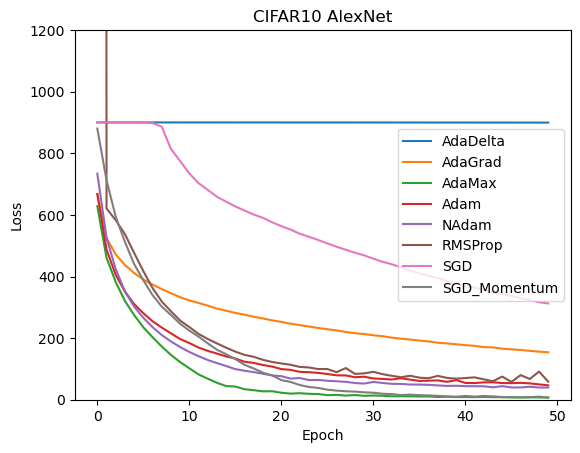

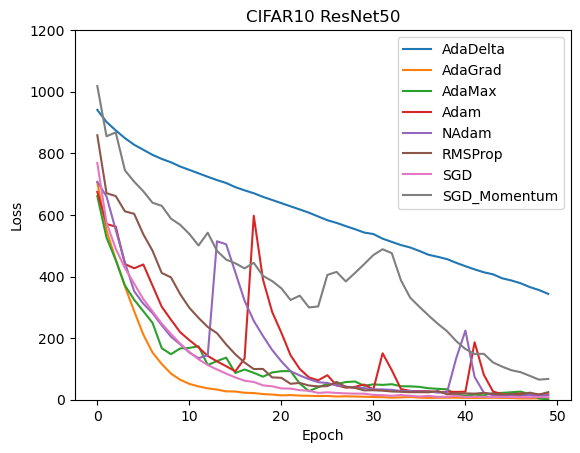

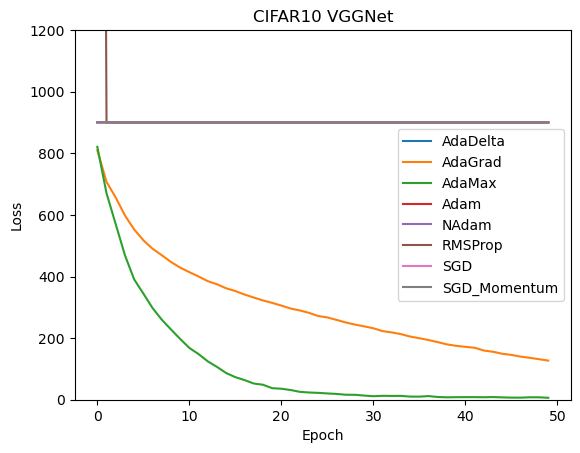

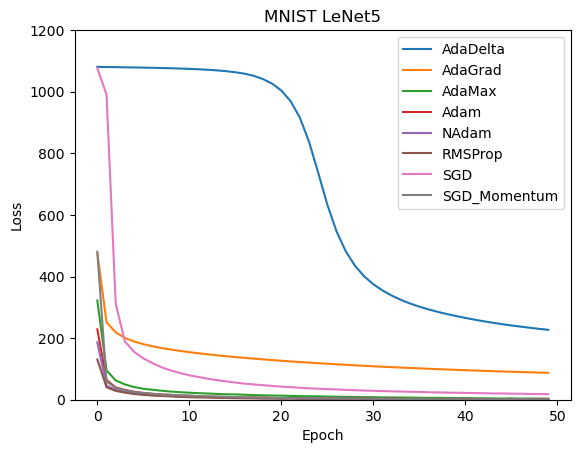

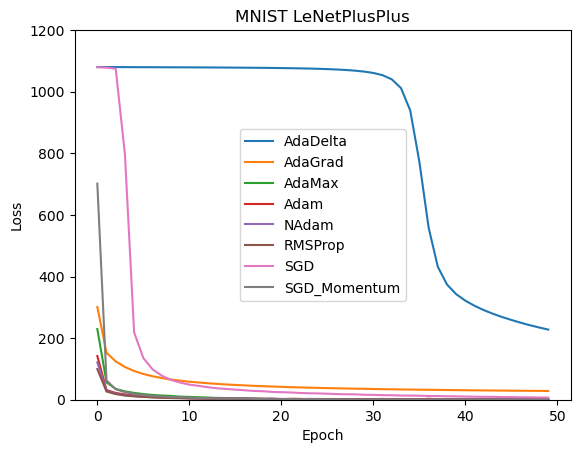

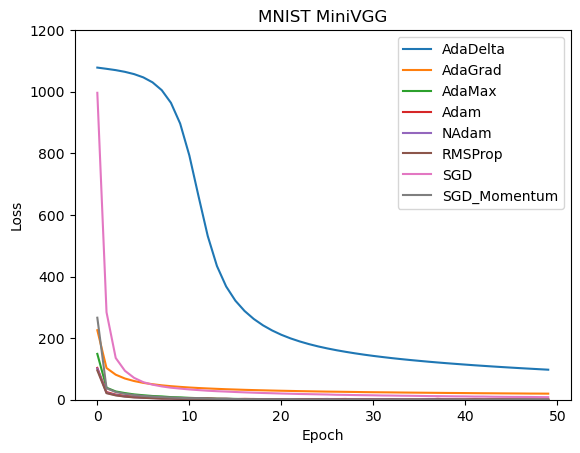

In [10]:
multi_index_df = df.pivot_table(
    values="Loss", index="Epoch", columns=["Model", "Optimization"]
)

# Plot losses per epoch for every optimization, making a plot for every model
for model in multi_index_df.columns.levels[0]:
    model_df = multi_index_df[model]
    ax = model_df.plot(legend=True)
    ax.set_ylim([0, 1200])
    ax.legend(loc="best")
    # plt.yscale('log')
    plt.title(model)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

In [11]:
multi_index_df.loc[0::7, ("CIFAR10 VGGNet", slice(None))]

Model        CIFAR10 VGGNet                                                  \
Optimization       AdaDelta     AdaGrad      AdaMax        Adam       NAdam   
Epoch                                                                         
0                900.364518  809.689187  821.128034  901.136825  900.839109   
7                900.339185  469.278574  260.009014  900.400142  900.394560   
14               900.342256  361.852237   86.683423  900.350159  900.353711   
21               900.325250  296.199878   31.569084  900.350790  900.348447   
28               900.337253  243.968485   15.964067  900.356375  900.346789   
35               900.320353  199.607846   10.002391  900.352083  900.359913   
42               900.321751  159.687378    8.050624  900.352550  900.352816   
49               900.311309  127.059914    6.262408  900.355331  900.347193   

Model                                               
Optimization      RMSProp         SGD SGD_Momentum  
Epoch                                               
0             6870.984361  900.366976   900.463814  
7              900.461057  900.355306   900.471791  
14             900.395924  900.348647   900.485007  
21             900.358314  900.347084   900.490082  
28             900.352427  900.318956   900.426485  
35             900.354772  900.334374   900.424270  
42             900.352450  900.339302   900.446994  
49             900.356225  900.306534   900.439484